In [1]:
import pandas as pd
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
data = pd.read_csv('data/data_train_DF.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,CNT,BA,lon,lat,area,year,month,lc1,lc2,lc3,...,clim1,clim2,clim3,clim4,clim5,clim6,clim7,clim8,clim9,clim10
0,0.0,0.000000,-95.25,49.25,0.24,1993,3,0.000006,0.015857,0.000023,...,0.222032,0.166899,265.457680,268.867126,-0.005898,9.187450e+06,-5231370.50,97849.906250,-0.000340,0.000448
1,0.0,0.000000,-94.75,49.25,0.39,1993,3,0.000005,0.002749,0.000002,...,0.184119,0.142053,265.521764,268.412354,-0.001131,6.993830e+06,-4851900.00,97954.703125,-0.000264,0.000462
2,0.0,0.000000,-122.75,48.75,0.48,1993,3,0.002420,0.103964,0.003870,...,-0.952649,0.856508,276.699820,280.594666,-0.010519,1.052566e+07,-4860741.00,100808.468750,-0.001945,0.004545
3,3.0,8.000000,-122.25,48.75,1.00,1993,3,0.002988,0.237442,0.004040,...,-0.845677,0.462569,274.943327,278.574371,-0.008420,9.359787e+06,-4653411.50,98474.648438,-0.001256,0.006174
4,0.0,0.000000,-121.75,48.75,1.00,1993,3,0.000000,0.004782,0.000196,...,-0.504174,0.195447,271.235317,274.578064,-0.005976,7.479946e+06,-3889238.75,91660.625000,-0.000502,0.008110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563978,6.0,134.600006,-80.75,25.75,1.00,2015,9,0.014934,0.017630,0.001066,...,-0.464231,0.159478,296.832658,300.201447,-0.006076,1.632964e+07,-3884615.75,101323.140625,-0.004034,0.006132
563979,1.0,30.000000,-80.25,25.75,0.66,2015,9,0.014798,0.014336,0.001253,...,-0.649578,0.404771,297.139517,300.414673,-0.005535,1.552289e+07,-3794893.75,101300.398438,-0.003913,0.006199
563980,0.0,0.000000,-81.25,25.25,0.28,2015,9,0.000000,0.000000,0.000000,...,-0.849243,0.676130,297.105902,301.003082,-0.007343,1.738194e+07,-3929039.00,101333.078125,-0.004233,0.003420
563981,2.0,179.100006,-80.75,25.25,0.76,2015,9,0.015875,0.039337,0.000373,...,-0.838257,0.589142,297.059054,300.905426,-0.006938,1.732889e+07,-4057722.00,101332.671875,-0.004125,0.003929


In [3]:
data.dtypes

CNT         float64
BA          float64
lon         float64
lat         float64
area        float64
year          int64
month         int64
lc1         float64
lc2         float64
lc3         float64
lc4         float64
lc5         float64
lc6         float64
lc7         float64
lc8         float64
lc9         float64
lc10        float64
lc11        float64
lc12        float64
lc13        float64
lc14        float64
lc15        float64
lc16        float64
lc17        float64
lc18        float64
altiMean    float64
altiSD      float64
clim1       float64
clim2       float64
clim3       float64
clim4       float64
clim5       float64
clim6       float64
clim7       float64
clim8       float64
clim9       float64
clim10      float64
dtype: object

In [4]:
data_validation = data[data.BA.isna() | data.CNT.isna()]
print('Validation Set Size :',len(data_validation),'- Proportion : %5.2f %%' % (100*len(data_validation)/len(data)))

Validation Set Size : 111053 - Proportion : 19.69 %


In [5]:
len(data[data.CNT.isna()])

80000

In [6]:
len(data[data.BA.isna()])

80000

In [7]:
len(data[data.BA.isna() & data.CNT.isna()])

48947

In [8]:
data.dropna(inplace=True)
data

,CNT,BA,lon,lat,area,year,month,lc1,lc2,lc3,...,clim1,clim2,clim3,clim4,clim5,clim6,clim7,clim8,clim9,clim10
0,0.0,0.000000,-95.25,49.25,0.24,1993,3,0.000006,0.015857,0.000023,...,0.222032,0.166899,265.457680,268.867126,-0.005898,9.187450e+06,-5231370.50,97849.906250,-0.000340,0.000448
1,0.0,0.000000,-94.75,49.25,0.39,1993,3,0.000005,0.002749,0.000002,...,0.184119,0.142053,265.521764,268.412354,-0.001131,6.993830e+06,-4851900.00,97954.703125,-0.000264,0.000462
2,0.0,0.000000,-122.75,48.75,0.48,1993,3,0.002420,0.103964,0.003870,...,-0.952649,0.856508,276.699820,280.594666,-0.010519,1.052566e+07,-4860741.00,100808.468750,-0.001945,0.004545
3,3.0,8.000000,-122.25,48.75,1.00,1993,3,0.002988,0.237442,0.004040,...,-0.845677,0.462569,274.943327,278.574371,-0.008420,9.359787e+06,-4653411.50,98474.648438,-0.001256,0.006174
4,0.0,0.000000,-121.75,48.75,1.00,1993,3,0.000000,0.004782,0.000196,...,-0.504174,0.195447,271.235317,274.578064,-0.005976,7.479946e+06,-3889238.75,91660.625000,-0.000502,0.008110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563978,6.0,134.600006,-80.75,25.75,1.00,2015,9,0.014934,0.017630,0.001066,...,-0.464231,0.159478,296.832658,300.201447,-0.006076,1.632964e+07,-3884615.75,101323.140625,-0.004034,0.006132
563979,1.0,30.000000,-80.25,25.75,0.66,2015,9,0.014798,0.014336,0.001253,...,-0.649578,0.404771,297.139517,300.414673,-0.005535,1.552289e+07,-3794893.75,101300.398438,-0.003913,0.006199
563980,0.0,0.000000,-81.25,25.25,0.28,2015,9,0.000000,0.000000,0.000000,...,-0.849243,0.676130,297.105902,301.003082,-0.007343,1.738194e+07,-3929039.00,101333.078125,-0.004233,0.003420
563981,2.0,179.100006,-80.75,25.25,0.76,2015,9,0.015875,0.039337,0.000373,...,-0.838257,0.589142,297.059054,300.905426,-0.006938,1.732889e+07,-4057722.00,101332.671875,-0.004125,0.003929


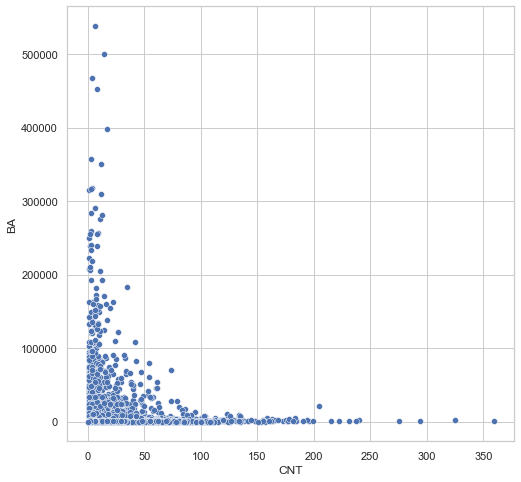

In [9]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='CNT', y='BA', data=data);

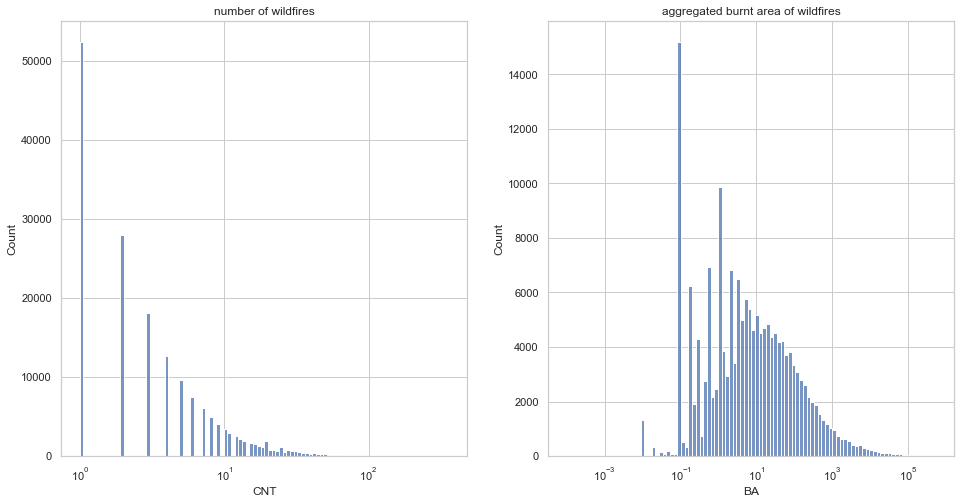

In [10]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].set_title('number of wildfires')
sns.histplot(x='CNT', log_scale=True, bins=100, data=data[data.CNT!=0], ax=ax[0])
ax[1].set_title('aggregated burnt area of wildfires')
sns.histplot(x='BA', log_scale=True, bins=100, data=data[data.BA!=0], ax=ax[1]);

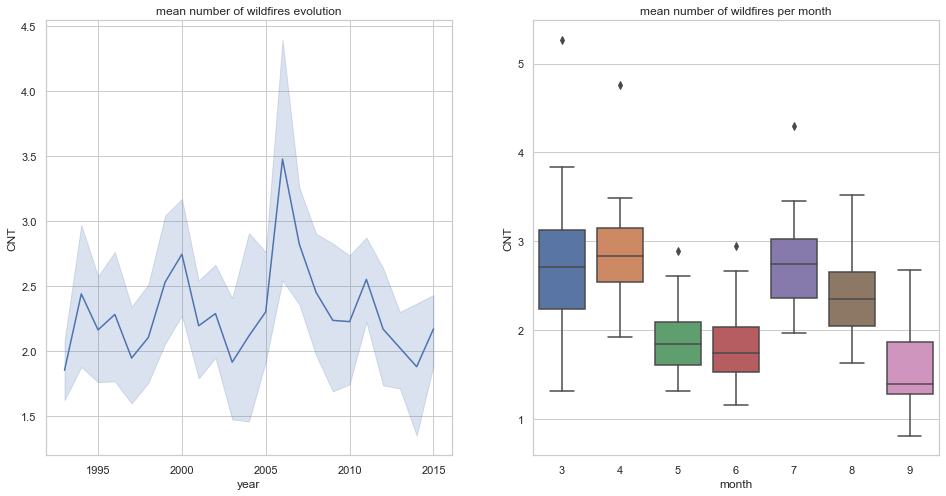

In [11]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].set_title('mean number of wildfires evolution')
sns.lineplot(x='year', y='CNT', data=data.groupby(by=['year','month'])[['CNT']].mean().reset_index(), ax=ax[0])
ax[1].set_title('mean number of wildfires per month')
sns.boxplot(x='month', y='CNT', data=data.groupby(by=['year','month'])[['CNT']].mean().reset_index(), ax=ax[1]);

We have an increase in the number of wildfires during march and april. June and July lower (isn't it odd?).

In [12]:
# Add indicator for fire occurence
data['fire'] = data['CNT'].apply(lambda x: 1 if x>0 else 0)

In [13]:
no_fire_pi = 10
data[data['fire']==0].sample(n=no_fire_pi, random_state=42)

,CNT,BA,lon,lat,area,year,month,lc1,lc2,lc3,...,clim2,clim3,clim4,clim5,clim6,clim7,clim8,clim9,clim10,fire
128794,0.0,0.0,-103.75,34.75,1.00,1998,4,0.000314,0.063738,0.007808,...,0.853056,269.890575,285.026154,-0.008288,2.016615e+07,-9789087.0,85662.015625,-0.001647,0.000695,0
354637,0.0,0.0,-84.75,44.25,1.00,2007,6,0.001487,0.026587,0.016081,...,0.288510,285.913617,293.445282,-0.025365,2.148330e+07,-6348392.5,97469.937500,-0.004304,0.002999,0
249062,0.0,0.0,-98.25,46.75,1.00,2003,4,0.002094,0.828623,0.000302,...,-0.100234,272.578618,279.894043,-0.005291,1.521789e+07,-6035712.0,96254.914062,-0.001686,0.001227,0
401760,0.0,0.0,-101.25,36.25,1.00,2009,5,0.003248,0.436498,0.004272,...,1.759035,281.237463,291.638672,-0.008551,1.848157e+07,-7574098.5,90588.609375,-0.001992,0.001130,0
182285,0.0,0.0,-91.25,48.25,0.40,2000,6,0.000000,0.000000,0.000000,...,0.345055,281.682042,286.301300,-0.015579,1.685866e+07,-4169614.0,95913.828125,-0.002458,0.003872,0
73500,0.0,0.0,-100.25,28.25,0.37,1995,9,0.128683,0.032709,0.041032,...,1.759521,291.907445,300.940796,-0.008391,1.681767e+07,-6211528.5,98454.117188,-0.002285,0.003112,0
155854,0.0,0.0,-112.25,39.75,1.00,1999,5,0.005554,0.027025,0.003067,...,-0.349777,273.911337,284.838196,-0.005799,2.170299e+07,-9188842.0,82924.531250,-0.002835,0.001950,0
119952,0.0,0.0,-71.25,44.25,1.00,1997,9,0.000134,0.008655,0.000096,...,-0.108076,281.829158,285.206573,-0.011906,1.164469e+07,-4206686.5,95018.015625,-0.002248,0.002368,0
270459,0.0,0.0,-85.75,44.75,1.00,2004,3,0.003189,0.031608,0.016535,...,0.609294,269.751510,272.935547,-0.004174,8.848903e+06,-3855285.5,98769.492188,-0.000417,0.003072,0
59962,0.0,0.0,-109.75,46.25,1.00,1995,6,0.035088,0.127380,0.010274,...,-0.028288,280.151130,286.412231,-0.006741,1.980051e+07,-6914186.5,85214.515625,-0.003674,0.004075,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Splitting data to train/test
X_train, X_test, y_train, y_test = train_test_split(data.drop(['fire','CNT','BA'], axis=1), data['fire'], test_size=0.3, random_state=42)

In [18]:
# Fitting LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
clf.predict_proba(X_train)

array([[0.43900021, 0.56099979],
       [0.57767639, 0.42232361],
       [0.59565337, 0.40434663],
       ...,
       [0.56734966, 0.43265034],
       [0.6171946 , 0.3828054 ],
       [0.58924007, 0.41075993]])

In [19]:
clf.predict(X_train)

array([1, 0, 0, ..., 0, 0, 0])

In [20]:
clf.score(X_test, y_test)

0.6351974918861635